1.Introduction\
This assignment will help you to consolidate the concepts learnt in the
session.

2.Problem Statement

Predicting Survival in the Titanic Data Set

We will be using a decision tree to make predictions about the Titanic dataset from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.


Url=https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ti
cket','Fare','Cabin','E mbarked']

You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.

NOTE:The solution shared through Github should contain the source code used and the screen shot of the output.

3.Output

This assignment consists of 200 marks and has to be submitted in
.ipynb/PDF format in the upcoming session for evaluation.

In [1]:
#Loading Data and modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url)
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived.

In [4]:
titanic.drop(labels=["Name", "Ticket", "Cabin", "Embarked", "PassengerId"], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [5]:
len(titanic)

891

#### Taking care of missing values

In [6]:
#percentage of nan values present in each feature
features_nan=[feature for feature in titanic.columns if titanic[feature].isnull().sum()>0]

for feature in features_nan:
    print(feature, np.round(titanic[feature].isnull().mean()*100, 2),  ' % missing values')

Age 19.87  % missing values


In [7]:
age_grpy = titanic.groupby(['Sex', 'SibSp','Parch', 'Fare', 'Pclass']).median()['Age']
age_grpy

Sex     SibSp  Parch  Fare     Pclass
female  0      0      6.7500   3         18.0
                      7.2250   3         15.0
                      7.2292   3         13.0
                      7.2500   3         22.0
                      7.4958   3         18.0
                                         ... 
male    4      1      39.6875  3          7.0
               2      31.2750  3          4.0
                      31.3875  3          6.0
        5      2      46.9000  3         10.0
        8      2      69.5500  3          NaN
Name: Age, Length: 445, dtype: float64

In [8]:
titanic['Age'] = titanic.groupby(['Sex', 'SibSp','Parch', "Pclass", "Fare"])['Age'].apply(lambda x: x.fillna(x.median()))
titanic.Age.isnull().sum()

c:\users\allyson\anaconda3\envs\practice\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


75

In [9]:
titanic['Age'] = titanic.groupby(['Sex', 'SibSp','Parch', "Pclass"])['Age'].apply(lambda x: x.fillna(x.median()))
titanic.Age.isnull().sum()

8

In [10]:
titanic['Age'] = titanic.groupby(["Pclass"])['Age'].apply(lambda x: x.fillna(x.median()))
titanic.Age.isnull().sum()

0

#### Taking care of Outliers

**Fare**

Text(0, 0.5, 'No of passenger')

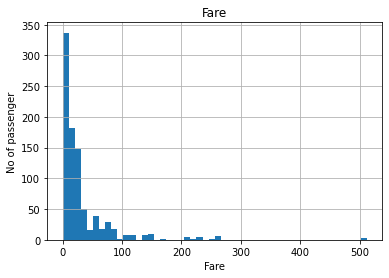

In [11]:
figure=titanic.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

<AxesSubplot:>

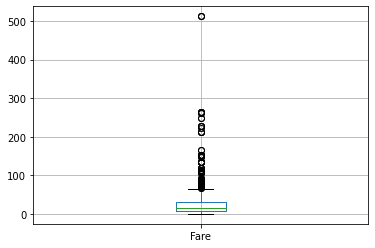

In [12]:
##Fare

titanic.boxplot(column="Fare")

In [13]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [14]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=titanic.Fare.quantile(0.75)-titanic.Fare.quantile(0.25)
lower_bridge=titanic['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=titanic['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [15]:
titanic.loc[titanic['Fare']>=101,'Fare']=101

Text(0, 0.5, 'No of passenger')

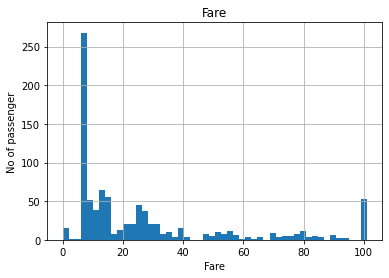

In [16]:
figure=titanic.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

**Age**

c:\users\allyson\anaconda3\envs\practice\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

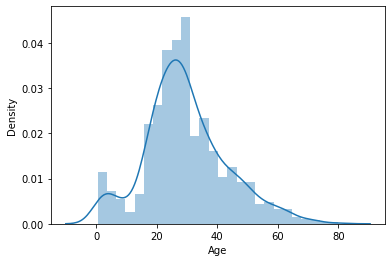

In [17]:
sns.distplot(titanic['Age'])

Text(0, 0.5, 'No of passenger')

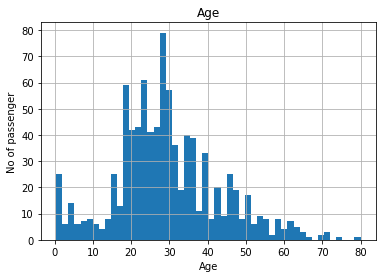

In [18]:
figure=titanic.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

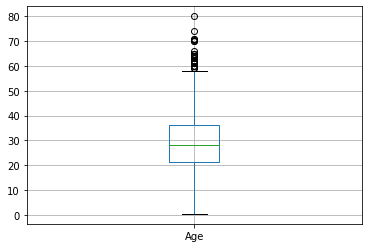

In [19]:
figure=titanic.boxplot(column="Age")

In [20]:
titanic['Age'].describe()

count    891.000000
mean      29.480269
std       13.592217
min        0.420000
25%       21.500000
50%       28.000000
75%       36.250000
max       80.000000
Name: Age, dtype: float64

In [21]:
uppper_boundary=titanic['Age'].mean() + 3* titanic['Age'].std()
lower_boundary=titanic['Age'].mean() - 3* titanic['Age'].std()
print(lower_boundary), print(uppper_boundary),print(titanic['Age'].mean())

-11.296380658607891
70.25691937914661
29.480269360269357


(None, None, None)

c:\users\allyson\anaconda3\envs\practice\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

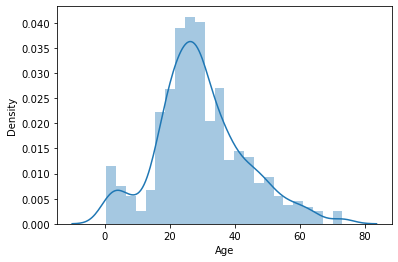

In [22]:
titanic.loc[titanic['Age']>=70,'Age']=73

sns.distplot(titanic['Age'])

#### Encoding Sex column variables

In [23]:
sex=pd.get_dummies(pd.get_dummies(titanic[["Sex"]]), drop_first=True)
titanic=titanic.join(sex)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,male,22.0,1,0,7.2500,0,1
1,1,1,female,38.0,1,0,71.2833,1,0
2,1,3,female,26.0,0,0,7.9250,1,0
3,1,1,female,35.0,1,0,53.1000,1,0
4,0,3,male,35.0,0,0,8.0500,0,1


In [24]:
titanic.drop(labels=["Sex", "Sex_female"], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [25]:
X = titanic.iloc[:, 1:].values
y = titanic.iloc[:, 0].values

#### train-test split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Decision Tree Model

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=10)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [30]:
cv = cross_val_score(classifier,X_train,y_train,cv=5)
print(cv)
print(cv.mean()*100)

[0.80597015 0.8358209  0.7761194  0.7518797  0.80451128]
79.48602850409605


In [31]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

DecisionTrees's Accuracy:  0.8475336322869955
[[129  10]
 [ 24  60]]


**This model performance and accuracy are relatively good when the hyperparameters are tuned**